In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 3.1

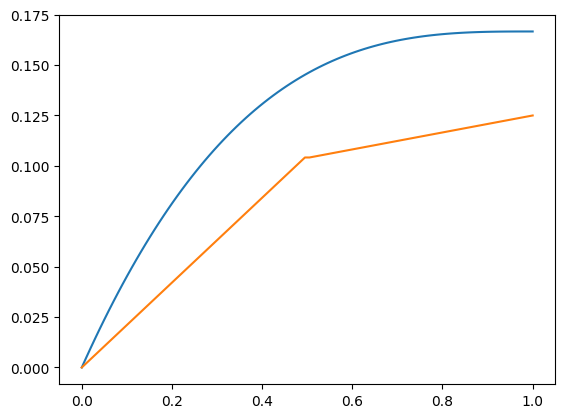

In [26]:
x = np.linspace(0,1,100)
x1 = np.linspace(0,0.5,50)
x2 = np.linspace(0.5,1,50)
z = np.zeros(50)
y = x*(x**2-3*x+3)/6


#N = [[1-x1,z],[2*x1,(2-2*x2)],[z,2*x2-1]]
N = [np.concatenate((1-x1,z), axis=0),np.concatenate((2*x1,(2-2*x2)), axis=0),np.concatenate((z,2*x2-1), axis=0)]
k = np.matrix([[-2,2,0],[2,0,2],[0,-2,2]])
f = np.array([5/24,1/4,1/24])
phi = np.linalg.solve(k,f)

phiT = np.zeros(100)

for i,v in enumerate(N):
    phiT += phi[i]*v


plt.plot(x,y)
plt.plot(x,phiT)
plt.show()


# Exercise 3.2

In [47]:
def N(A,x):
    if nodes[A-1]<=x<=nodes[A]:
        return (x-nodes[A-1])/(x)
    if nodes[A]<=x<=nodes[A+1]:
        return (nodes[A+1]-x)/(x)
    else:
        return 0 

def stiffness(nodes):
    #return (-1)^sum(nodes)/(x[nodes[1]]-x[nodes[0]])
    return 1/dx*np.array([[1,-1],[-1,1]])

def force(nodes, S):
    #return ((x[nodes[1]]-x[nodes[0]])/6)*np.array([[2*S[0]+S[1]],[S[0]+2*S[1]]])
    return dx/3*np.array([1,2])

In [ ]:
alpha=.1
beta=-.2

Ne = 10
nodes = np.array([0, *sorted(np.random.rand(Ne-1)), 1])
dx=nodes[1]-nodes[0]

LM = np.zeros((2, Ne), dtype=np.int64)
for e in range(Ne):
    if e==0:
        LM[0, e] = -1
        LM[1, e] = 0
    else:
        LM[0, e] = LM[1, e-1]
        LM[1, e] = LM[0, e] + 1
K = np.zeros((Ne, Ne))
F = np.zeros((Ne,))
for e in range(Ne):
    k_e = stiffness(nodes[e:e+2])
    f_e = force(nodes[e:e+2], S)
    for a in range(2):
        A = LM[a, e]
        for b in range(2):
            B = LM[b, e]
            if (A >= 0) and (B >= 0):
                K[A, B] += k_e[a, b]
        if (A >= 0):
            F[A] += f_e[a]
    # Modify force vector for Dirichlet BC
    if e == 0:
        F[0] -= alpha * k_e[1, 0]
# Modify force vector for Neumann BC
F[-1] += beta
# Solve
Psi_A = np.zeros_like(nodes)
Psi_A[0] = alpha
Psi_A[1:] = np.linalg.solve(K, F)

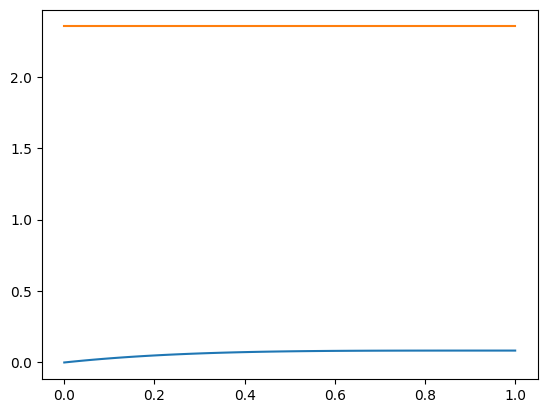

In [56]:
x_ana=np.linspace(0,1,100)
y_ana=x_ana*(4-6*x_ana+4*x**2-x**3)/12

phiT = np.zeros(len(nodes))

for e in range(Ne):
    for a in range(2):
        A = LM[a, e]
        phiT += Psi_A[i]*N(A,nodes[i])

plt.plot(x_ana,y_ana)
plt.plot(nodes,phiT)
plt.show()

In [54]:
F

array([4.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 1.16666667])

In [55]:
K

array([[ 8., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-4.,  8., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -4.,  8., -4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -4.,  8., -4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -4.,  8., -4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -4.,  8., -4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -4.,  8., -4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -4.,  8., -4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -4.,  8., -4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -4.,  4.]])